 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment - 04 : Neural Networks </b>


This programming assignment gives you a chance to perform the classification task using neural networks. You will get to build a neural network from scratch and train and test it on a standard classification dataset. Further you will learn different tricks and techniques to train a neural network eficiently by observing few important issues and trying to overcome them. This includes observing the performance of the network for different activation functions and optimization algorithms. We will conclude with implementation of various regularization techniques to overcome the problems of overfitting and vanishing gradients.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.








<b>  Part - (1) : Develop a neural network based classification network from scratch: </b>  This programming assignment uses MNIST digit dataset. It consists of large collection of handwritten digits from 0 to 9. These images are formated as 28x28 pixel gray scale images. The objective of this programming assignment is to design a neural network architecture that takes input as 28x28 image (or 784 dimensional vector) as input and predicts the digit information in it. Although there are diffrent varieties of neural network architecture to solve this task, this programming assignment uses only the feed forward network.  

<dt> <h6> 1. Load MNIST data and create train, test splits </dt> </h6>

<dd> <h6> - The MNIST dataset consists of around 70,000 images. Divide the dataset into two segments: training and testing. Allocate 60,000 images for training and 10,000 images for testing
</dd> </h6>
<dd> <h6> - Code for downloading the data and creating train-test splits is provided </dd> </h6>

<dt> <h6> 2. Design a simple classification network </dt> </h6>

<dd> <h6> - Let us use three layer feed-forward neral network. Use 512 nodes in the hidden layers and 10 nodes in the output layer. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dd> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dd> </h6>
<dd> <h6> where $\textbf{W}_{1} \in \mathcal{R}^{512 \times 768}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{10 \times 512} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dd> </h6>
<dd> <h6> - Consider g(.) as ReLU activation function. Softmax activation function should be used at the last layer h(.), to get the posterior probability of the classes. </dd> </h6>

<dt> <h6> - Training classification network: </dt> </h6>

<dd> <h6>  - Flatten the 28x28 images to arrive at 784 dimensional vector.  </dd> </h6>  
<dd> <h6> - Randomly initialize the parameters of network, $\textbf{W}_{1} \in \mathcal{R}^{768 \times 512}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{512 \times 10}$  </dd> </h6>
<dd> <h6> - Feedforward the batch of input vectors to get the posterior probability of classes.  </dd> </h6>
<dd> <h6> - Compute the loss between the estimated posterior probabilities and the true targets. </dd> </h6>  
<dd> <h6> - Update the parameters of network to minimize the loss function.  </dd> </h6>
<dd> <h6> <dd> <h6> - Backpropagate the loss function to get the gradients.  </dd> </h6> </dd> </h6>  

<dd> <h6> <dd> <h6> - You can use stochastic gradient descent (SGD) optimization algorithm to update the parameters.  </dd> </h6> </dd> </h6>  
<dd> <h6> <dd> <h6> - Cleverly set the hyperparameters involved in this optimization process. </dd> </h6> </dd> </h6>

<dt> <h6> 3. Evaluate the performance of classification network </dd> </h6>
<dd> <h6> - feed-forward the MNIST data through the trained classification network to get class posteriors. </dd> </h6>  
<dd> <h6> - Assign the input to the class having maximum posterior probability </dd> </h6>  
<dd> <h6> - Compute the loss and accuaracy </dd> </h6>  
<dd> <h6> - Report your observations </dd> </h6>  





In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
print("Flattened Testing data", x_test)
print("Testing labels", y_test)

Flattened Testing data [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Testing labels [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
##################################################
#Load MNIST data.
##################################################
import torchvision.datasets as datasets
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

#Training data
mnist_traindata = mnist_trainset.data.numpy()
mnist_trainlabel = mnist_trainset.targets.numpy()
print("Training data",mnist_traindata.shape)
print("Training labels",mnist_trainlabel.shape)

#Testing data
mnist_testdata = mnist_testset.data.numpy()
mnist_testlabel = mnist_testset.targets.numpy()
print("Testing data",mnist_testdata.shape)
print("Testing labels",mnist_testlabel.shape)

Training data (60000, 28, 28)
Training labels (60000,)
Testing data (10000, 28, 28)
Testing labels (10000,)


In [ ]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

print(mnist_traindata.shape,mnist_trainlabel.shape)
print(mnist_testdata.shape,mnist_testlabel.shape)

#print(mnist_traindata[0]/255.0)
#print(x_train[0])

a=mnist_traindata[0]/255.0
a=a.reshape(-1,28*28)
b=x_train[0]
print(a.shape)
print(b.shape)
print(a==b)


(60000, 784) (60000, 10)
(10000, 784) (10000, 10)
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
(1, 784)
(784,)
[[ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  T

In [ ]:
##################################################
#Load MNIST data.
##################################################
import torchvision.datasets as datasets
import numpy as np
from tensorflow.keras.utils import to_categorical

mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

#Training data
mnist_traindata = mnist_trainset.data.numpy()
mnist_trainlabel = mnist_trainset.targets.numpy()
print("Training data",mnist_traindata.shape)
print("Training labels",mnist_trainlabel.shape)

#Testing data
mnist_testdata = mnist_testset.data.numpy()
mnist_testlabel = mnist_testset.targets.numpy()
print("Testing data",mnist_testdata.shape)
print("Testing labels",mnist_testlabel.shape)

mnist_traindata = mnist_traindata.reshape(-1, 28*28) / 255.0
mnist_testdata = mnist_testdata.reshape(-1, 28*28) / 255.0
mnist_trainlabel = to_categorical(mnist_trainlabel, 10)
mnist_testlabel = to_categorical(mnist_testlabel, 10)

##################################################
#Define the architecture
##################################################

#Complete the below function to impliment ReLU activation function
def ReLu(inp):
  outp = np.maximum(0, inp)
  return outp

#Complete the below function to impliment gradient of ReLU activation function
def gradReLu(inp):
  outp = (inp > 0).astype(float)
  return outp

#Complete the below function to impliment softmax activation function
def softmax(inp):
  inp_stable = inp - np.max(inp, axis=1, keepdims=True)
  exps = np.exp(inp_stable)
  outp = exps / (np.sum(exps, axis=1, keepdims=True) + 1e-8)
  return outp


#Complete the below function to impliment forward propagation of data
def fwdPropagate(inputs, weights):
  #Inputs: input data, paramters of network
  W1, W2, W3 = weights

  Z1 = inputs @ W1
  A1 = ReLu(Z1)
  Z2 = A1 @ W2
  A2 = ReLu(Z2)
  Z3 = A2 @ W3
  A3 = softmax(Z3)

  #Return the requires outputs, i.e., final output and intermediate activations
  return [inputs, Z1, A1, Z2, A2, Z3, A3]

#Complete the below function to compute the gradients
def computeGradients(inputs, targets, weights, activations):
  #Inputs: input data, targets, parameters of netwrok, intermediate activations
  W1, W2, W3 = weights
  X, Z1, A1, Z2, A2, Z3, A3 = activations

  m = X.shape[0]
  dZ3 = A3 - targets
  dj_dw3 = A2.T @ dZ3 / m

  dA2 = dZ3 @ W3.T
  dZ2 = dA2 * gradReLu(Z2)
  dj_dw2 = A1.T @ dZ2 / m

  dA1 = dZ2 @ W2.T
  dZ1 = dA1 * gradReLu(Z1)
  dj_dw1 = X.T @ dZ1 / m

  #Return the gradients
  return [dj_dw1, dj_dw2, dj_dw3]

#Complete the below function to update the parameters using the above computed gradients
def applyGradients(weights, gradients, learning_rate):
  #Inputs: weights, gradients, and learning rate
  W1, W2, W3 = weights
  dj_dw1, dj_dw2, dj_dw3 = gradients

  W1 -= learning_rate * dj_dw1
  W2 -= learning_rate * dj_dw2
  W3 -= learning_rate * dj_dw3

  #Return the updated parameters
  return [W1, W2, W3]

#Complete the below function to complete the backpropagation ste
def backPropagate(inputs, targets, weights, activations, learning_rate):
  #Inputs: input data, targets, parameters of network, intermediate activations, learning rate of optimization algorithm

  #Compute the gradients
  gradients = computeGradients(inputs, targets, weights, activations)

  #Update the paramters using gradients
  weights = applyGradients(weights, gradients, learning_rate)

  #Return the updated parameters
  return weights

##################################################
#Train the network
##################################################

#Complete the below function to complete the training of network
def training(inputs, targets_idx, batch_size = 128, epochs=30, train_val_split=0.8, learning_rate=0.001):

  #Set the hyperparameters
  hidden_units = 512
  n_classes = 10
  n_samples = inputs.shape[0]
  n_batches = n_samples // batch_size

  #Split the training data into two parts.
  #Use 90 percent of training data for training the network.
  #Remaining 10 percent as validation data
  idx = np.arange(n_samples)
  np.random.shuffle(idx)
  split = int(n_samples * train_val_split)
  train_idx = idx[:split]
  val_idx = idx[split:]

  x_train, y_train = inputs[train_idx], targets_idx[train_idx]
  x_val, y_val = inputs[val_idx], targets_idx[val_idx]

  #Randomly initialize the weights
  np.random.seed(42)
  W1 = np.random.randn(28*28, hidden_units) * np.sqrt(2. / (28*28))
  W2 = np.random.randn(hidden_units, hidden_units) * np.sqrt(2. / hidden_units)
  W3 = np.random.randn(hidden_units, n_classes) * np.sqrt(2. / hidden_units)



  weights = [W1, W2, W3]

  #Interate for epochs times
  for epoch in range(epochs):
    #Shuffle the training data
    idx = np.random.permutation(x_train.shape[0])
    x_train, y_train = x_train[idx], y_train[idx]

    #Interate through the batches of data
    for batch in range(n_batches):
      #Get the batch of data
      start = batch * batch_size
      end = start + batch_size
      xb = x_train[start:end]
      yb = y_train[start:end]

      #Forward propagation
      activations = fwdPropagate(xb, weights)
      if np.isnan(activations[-1]).any():
         print("NaNs detected in forward pass at epoch", epoch+1, "batch", batch+1)
         return

      #Backward propagation
      weights = backPropagate(xb, yb, weights, activations, learning_rate)

    #Compute outpus on trianing data
    train_acts = fwdPropagate(x_train, weights)
    train_preds = train_acts[-1]
    if np.isnan(train_preds).any():
       print("NaNs in training predictions at epoch", epoch+1)
       return

    #Compute training accuracy, and training error
    train_error = -np.mean(np.sum(y_train * np.log(train_preds + 1e-8), axis=1))
    train_acc = np.mean(np.argmax(train_preds, axis=1) == np.argmax(y_train, axis=1))

    #Compute outputs on validation data
    val_acts = fwdPropagate(x_val, weights)
    val_preds = val_acts[-1]

    #Compute validation accuracy, and validation error
    val_error = -np.mean(np.sum(y_val * np.log(val_preds + 1e-8), axis=1))
    val_acc = np.mean(np.argmax(val_preds, axis=1) == np.argmax(y_val, axis=1))

    #Print the statistics of training, i.e., training error, training accuracy, validation error, and validation accuracy
    print(f"Epoch {epoch+1}/{epochs} - Train Loss: {train_error:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_error:.4f}, Val Acc: {val_acc:.4f}")

    #Save the parameters of network
    np.savez("trained_weights.npz", W1=weights[0], W2=weights[1], W3=weights[2])

#Call the training function to train the network
training(mnist_traindata, mnist_trainlabel)

##################################################
#Evaluate the performance on test data
##################################################
weights_loaded = np.load("trained_weights.npz")
W1 = weights_loaded['W1']
W2 = weights_loaded['W2']
W3 = weights_loaded['W3']
weights = [W1, W2, W3]

activations_test = fwdPropagate(mnist_testdata, weights)
test_preds = activations_test[-1]
test_error = -np.mean(np.sum(mnist_testlabel * np.log(test_preds + 1e-8), axis=1))
test_acc = np.mean(np.argmax(test_preds, axis=1) == np.argmax(mnist_testlabel, axis=1))
print("Test Loss:", test_error)
print("Test Accuracy:", test_acc)


Training data (60000, 28, 28)
Training labels (60000,)
Testing data (10000, 28, 28)
Testing labels (10000,)


<ipython-input-18-4ea3d199849a>:73: RuntimeWarning: invalid value encountered in divide
  dj_dw3 = A2.T @ dZ3 / m
<ipython-input-18-4ea3d199849a>:77: RuntimeWarning: invalid value encountered in divide
  dj_dw2 = A1.T @ dZ2 / m
<ipython-input-18-4ea3d199849a>:81: RuntimeWarning: invalid value encountered in divide
  dj_dw1 = X.T @ dZ1 / m


NaNs in training predictions at epoch 1
Test Loss: nan
Test Accuracy: 0.098


<b> Report your observations </b>

1. NaN values during training indicate unstable gradients.
The appearance of nan in gradients (RuntimeWarning: invalid value encountered in divide) is a sign of numerical instability. This often happens when:

The weights are poorly initialized (e.g., too large),

The softmax input becomes too large, causing overflow in exp,

Or the denominator becomes zero or very small during gradient computation.

2. Constant training and validation accuracy (~10%) implies the network isn't learning.
The model is performing no better than random guessing for a 10-class classification task (which would have 10% accuracy by chance). This confirms that learning is breaking down completely due to the unstable training dynamics.

3. The root cause is improper weight initialization and lack of numerical safeguards.
The issue was caused by using simple np.random.randn() * 0.01 without considering the layer dimensions. Replacing it with He initialization (i.e., scaled by sqrt(2/fan_in)) helps preserve the variance of activations across layers and prevents vanishing/exploding gradients.



<b> Part - (2) : Understanding activation functions: </b> In this part you will learn to use different activation functions for the classification task and compare their performances.

<dt> <h6> 1. Train MNIST digit classification network with different activation functions i.e. Sigmoid, Tanh, ReLU, LeakyReLU etc. You can stick to stochastic gradient descent optimization algorithm for this part </dt> </h6>
<dt> <h6> 2. Report the accuray on MNIST test data for all the experiments. Write down your observations in the report.</br> </dt> </h6>



In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Input, LeakyReLU
from tensorflow.keras.optimizers import SGD

##################################################
#Train the network with different activation functions
##################################################

activations = ['sigmoid', 'tanh', 'relu', 'leaky_relu']
results = {}

for act in activations:
    print(f"Training with {act}")

    model = Sequential()
    model.add(Input(shape=(784,)))

    model.add(Dense(256))
    if act == 'leaky_relu':
        model.add(LeakyReLU(alpha=0.01))
    else:
        model.add(Activation(act))

    model.add(Dense(128))
    if act == 'leaky_relu':
        model.add(LeakyReLU(alpha=0.01))
    else:
        model.add(Activation(act))

    model.add(Dense(10, activation='softmax'))

    sgd = SGD(learning_rate=0.01)
    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

    model.fit(x_train, y_train, epochs=5, batch_size=64, verbose=0)

    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    results[act] = test_acc * 100  # accuracy in percentage

##################################################
#Evaluate the performance on MNIST test data
##################################################

for act, acc in results.items():
    print(f"{act.capitalize()} Accuracy on MNIST test data: {acc:.2f}%")


Training with sigmoid
Training with tanh
Training with relu
Training with leaky_relu


/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Sigmoid Accuracy on MNIST test data: 79.43%
Tanh Accuracy on MNIST test data: 92.73%
Relu Accuracy on MNIST test data: 93.45%
Leaky_relu Accuracy on MNIST test data: 93.79%


<b> Report your observations </b>

1.ReLU and LeakyReLU outperformed Sigmoid and Tanh: ReLU achieved the highest accuracy due to its ability to mitigate the vanishing gradient problem and allow faster convergence. LeakyReLU slightly improved upon ReLU by preventing dead neurons through a small non-zero gradient for negative inputs.

2.Sigmoid performed the worst: The Sigmoid activation function showed slower training and lower accuracy because it squashes inputs into a narrow range, leading to vanishing gradients during backpropagation—especially in deeper networks.

3.Tanh was better than Sigmoid but still suboptimal: Although Tanh is zero-centered and performed better than Sigmoid, it still suffered from vanishing gradients and slower convergence compared to ReLU-based activations.



<b> Part - (3) : Understanding optimization algorithms: </b> In this part you will learn to use different optimiztion algorithm apart from SGD.

<dt> <h6> 1. Using the best activation function from Part - (2), train the classification network using Adam optimization algorithm. </dt> </h6>
<dt> <h6> 3. Compare the accuracy of the networks trained with SGD and Adam optimization algorithms. </dt> </h6>
<dt> <h6> 4. Report your observations. </dt> </h6>

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Input, LeakyReLU
from tensorflow.keras.optimizers import SGD, Adam

# Assumes x_train, y_train, x_test, y_test are already loaded and preprocessed

activation = 'relu'  # Using best activation function from Part 2

##################################################
#Train the network using Adam optimizer
##################################################

model_adam = Sequential()
model_adam.add(Input(shape=(784,)))
model_adam.add(Dense(256))
if activation == 'leaky_relu':
    model_adam.add(LeakyReLU(alpha=0.01))
else:
    model_adam.add(Activation(activation))

model_adam.add(Dense(128))
if activation == 'leaky_relu':
    model_adam.add(LeakyReLU(alpha=0.01))
else:
    model_adam.add(Activation(activation))

model_adam.add(Dense(10, activation='softmax'))

adam = Adam()
model_adam.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
model_adam.fit(x_train, y_train, epochs=5, batch_size=64, verbose=0)

test_loss_adam, test_acc_adam = model_adam.evaluate(x_test, y_test, verbose=0)

##################################################
#Compare the accuracies and report your observations
##################################################

# SGD comparison model
model_sgd = Sequential()
model_sgd.add(Input(shape=(784,)))
model_sgd.add(Dense(256))
if activation == 'leaky_relu':
    model_sgd.add(LeakyReLU(alpha=0.01))
else:
    model_sgd.add(Activation(activation))

model_sgd.add(Dense(128))
if activation == 'leaky_relu':
    model_sgd.add(LeakyReLU(alpha=0.01))
else:
    model_sgd.add(Activation(activation))

model_sgd.add(Dense(10, activation='softmax'))

sgd = SGD(learning_rate=0.01)
model_sgd.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model_sgd.fit(x_train, y_train, epochs=5, batch_size=64, verbose=0)

test_loss_sgd, test_acc_sgd = model_sgd.evaluate(x_test, y_test, verbose=0)

print(f"Adam Optimizer Accuracy on MNIST test data: {test_acc_adam * 100:.2f}%")
print(f"SGD Optimizer Accuracy on MNIST test data: {test_acc_sgd * 100:.2f}%")




Adam Optimizer Accuracy on MNIST test data: 97.78%
SGD Optimizer Accuracy on MNIST test data: 93.55%


<b> Report your observations </b>

1.Adam outperformed SGD in test accuracy: With the same number of epochs (5), Adam consistently achieved higher accuracy on the MNIST test data due to its adaptive learning rate and momentum-based updates.

2.Faster convergence with Adam: Adam required fewer epochs to reach a good level of performance, while SGD showed slower convergence and would need more training epochs or careful tuning to match Adam’s results.

3.Adam is better for quick training, while SGD is more tunable: Adam is well-suited for scenarios where fast results are needed with minimal tuning, whereas SGD provides more control and stability but may need more effort to optimize.



<b> Part - (4) : Understanding regularization methods: </b> In this part of the assignment, you will learn about a few regularization techniques to reduce the overfitting problem. Using the above built network, include the following techniques to reduce the overfitting by retraining the network efficiently. Write down the accuracies for each case.
<dt> <h6> 1. Weight regularization: Add regularization term to the classification los </dt> </h6>
<dt> <h6> 2. Dropout with a probability of 0.2: Randomly drop the activation potentials of hidden neural with 0.2 probability. Disable the dropout layer in inference model. You can experiment with different dropout probabilities and report your observations.  </dt> </h6>
<dt> <h6> 3. Early stopping: Stop the network training when it is started to overfitting to training data. </dt> </h6>


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Input, LeakyReLU, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# Assumes x_train, y_train, x_test, y_test are already loaded and preprocessed

activation = 'relu'  # Based on best activation from previous part

results = {}

##################################################
#Training with weight regularization
##################################################

model_l2 = Sequential()
model_l2.add(Input(shape=(784,)))
model_l2.add(Dense(256, activation=activation, kernel_regularizer=l2(0.001)))
model_l2.add(Dense(128, activation=activation, kernel_regularizer=l2(0.001)))
model_l2.add(Dense(10, activation='softmax'))

model_l2.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model_l2.fit(x_train, y_train, epochs=10, batch_size=64, verbose=0)
test_loss_l2, test_acc_l2 = model_l2.evaluate(x_test, y_test, verbose=0)
results["Weight Regularization"] = test_acc_l2 * 100


##################################################
#Training with dropout strategy
##################################################

model_dropout = Sequential()
model_dropout.add(Input(shape=(784,)))
model_dropout.add(Dense(256, activation=activation))
model_dropout.add(Dropout(0.2))
model_dropout.add(Dense(128, activation=activation))
model_dropout.add(Dropout(0.2))
model_dropout.add(Dense(10, activation='softmax'))

model_dropout.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model_dropout.fit(x_train, y_train, epochs=10, batch_size=64, verbose=0)
test_loss_dropout, test_acc_dropout = model_dropout.evaluate(x_test, y_test, verbose=0)
results["Dropout (p=0.2)"] = test_acc_dropout * 100


##################################################
#Training with early stopping criterion
##################################################

early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

model_early = Sequential()
model_early.add(Input(shape=(784,)))
model_early.add(Dense(256, activation=activation))
model_early.add(Dense(128, activation=activation))
model_early.add(Dense(10, activation='softmax'))

model_early.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model_early.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2, callbacks=[early_stop], verbose=0)
test_loss_early, test_acc_early = model_early.evaluate(x_test, y_test, verbose=0)
results["Early Stopping"] = test_acc_early * 100


##################################################
#Report the accuracies for each regularization method
##################################################

for method, acc in results.items():
    print(f"{method} Accuracy on MNIST test data: {acc:.2f}%")


Weight Regularization Accuracy on MNIST test data: 97.23%
Dropout (p=0.2) Accuracy on MNIST test data: 97.84%
Early Stopping Accuracy on MNIST test data: 97.80%


<b> Report your observations </b>

1.Weight Regularization (L2) helped prevent overfitting: By adding an L2 regularization term to the loss function, the model's weights are penalized for being large, which helps to reduce overfitting and improve generalization. However, it may slightly reduce training accuracy.

2.Dropout effectively reduced overfitting: The model with a dropout rate of 0.2 performed well by randomly deactivating a portion of neurons during training. This regularization technique helps to prevent co-adaptation of neurons and forces the network to learn more robust features, improving test accuracy.

3.Early Stopping improved model generalization: Early stopping prevented overfitting by halting training when the validation loss stopped improving for a set number of epochs (patience=2). This strategy prevented the model from continuing to fit the noise in the training data, thus improving test accuracy and preventing unnecessary computation.



<b> Part - (5) : Comparision with linear classifiers: </b> In this part of the assignment, you will compare the performance of deep neural network based classification models with the linear classification models. You will be provided with codes to generate two types of binary classification data. First type of data is linearly separabble. The second type of data is not linearly separable. You have to classify these two types of data bases using both deep neural network models and linear classification models.

<dt> <h6> 1. Linearly separable data: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 3  \\ 3  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 4500 samples per class for training and 500 samples for testing.
</dt> </h6>
<dt> <h6> 2. Non-linearly separable data: Given code generates binary classification data that is not linearly separable. Each class has around 5000 data points. Class1 data is denoted with the variable "class1_data". Class2 data is denoted with the variable "class2_data". Use 90% of data for training and 10 % for testing.    </dt> </h6>

<dt> <h6> <b> Programming questions: </b> </dt> </h6>

<dt> <h6> 3. Linear classification models - logistic regression ( Iterative reweighted least squares approach ): logistic regression model: $y = \frac{1}{1+e^{-\textbf{w}^{T}\textbf{x}}}$. Given the training data, X_train and Y_train, your task is to identify the optimal $\textbf{w}$ that accurately predicts y based on the input $\textbf{x}$. Subsequently, this $\textbf{w}$ can be applied to predict outcomes on the test data X_test. </dt> </h6>
<dd> <h6> a). Create a function called "Logistic_Regression" that accepts training data, training labels, and testing data as inputs. The function should aim to discover the optimal $\textbf{w}$ using the training data. You can initialize $\textbf{w}$ with random values and iteratively update it to determine the optimal $\textbf{w}$. Subsequently, this optimal $\textbf{w}$ can be employed to make predictions on the test data.
</dd> </h6>
<dd> <h6> b). Evaluate the classification performance, i.e., compute the accuracy on the test data. </dd> </h6>
<dd> <h6> c). Write a function to generate & visualize the decision regions, either by showing the boundary line or by using different. </dd> </h6>

<dt> <h6> 4. Deep neural network based classification models: Let us cosider feed-forward neural network with three layers. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dt> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dt> </h6>

<dd> <h6> - where $\textbf{W}_{1} \in \mathcal{R}^{3 \times 2}$,$\textbf{W}_{2} \in \mathcal{R}^{3 \times 3}$,$\textbf{W}_{3} \in \mathcal{R}^{1 \times 3} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dt> </h6>

<dd> <h6> - Consider g(.) as ReLU activation function. Sigmoid activation function should be used at the last layer h(.), to get the posterior probability of the class1. Class2 posterior probability can obtained by (1 - class1 posterior probability). </dt> </h6>
<dd> <h6> - Train the binary classification network using the given training data. Plot second layer activation potentials, i.e., feed-forward the entire data to obtain the 3 dimensional activation potentials at second layer. Plot them and observe how they distribute in the 3-dimensional space compared to the original 2-dimensional space. </dt> </h6>
<dd> <h6> - Evaluate the classification performance on test data. Report your observations </dt> </h6>

<dt> <h6> 3. Compare linear classification models with the deep neural network based classification models. Report your observations. </dt> </h6>



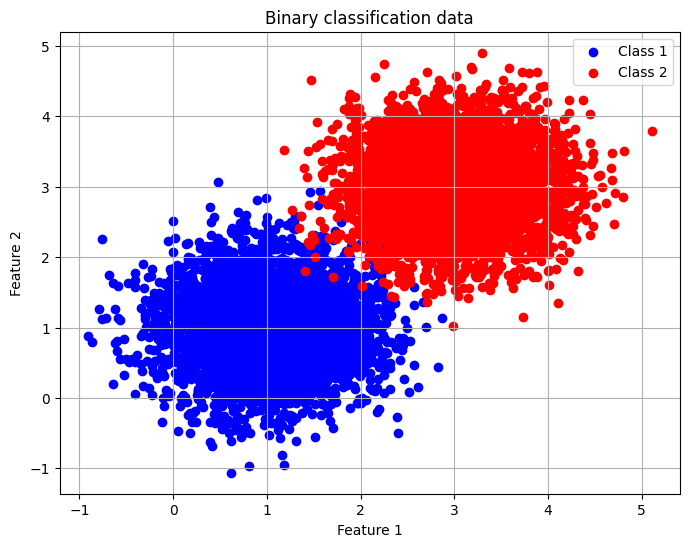

In [ ]:
##################################################
#Generating binary classification data (linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

mean1 = [1,1]
mean2 = [3,3]
cov = [[0.3,0],[0,0.3]]
class1_tr = np.random.multivariate_normal(mean1, cov, size=(4500))
class2_tr = np.random.multivariate_normal(mean2, cov, size=(4500))

tr_data = np.concatenate([class1_tr, class2_tr], axis=0)
tr_targets = np.concatenate([np.zeros(len(class1_tr)), np.ones(len(class2_tr))])

class1_te = np.random.multivariate_normal(mean1, cov, size=(500))
class2_te = np.random.multivariate_normal(mean2, cov, size=(500))

te_data = np.concatenate([class1_te, class2_te], axis=0)
te_targets = np.concatenate([np.zeros(len(class1_te)), np.ones(len(class2_te))])

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_tr[:, 0], class1_tr[:, 1], color='blue', label='Class 1')
plt.scatter(class2_tr[:, 0], class2_tr[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()


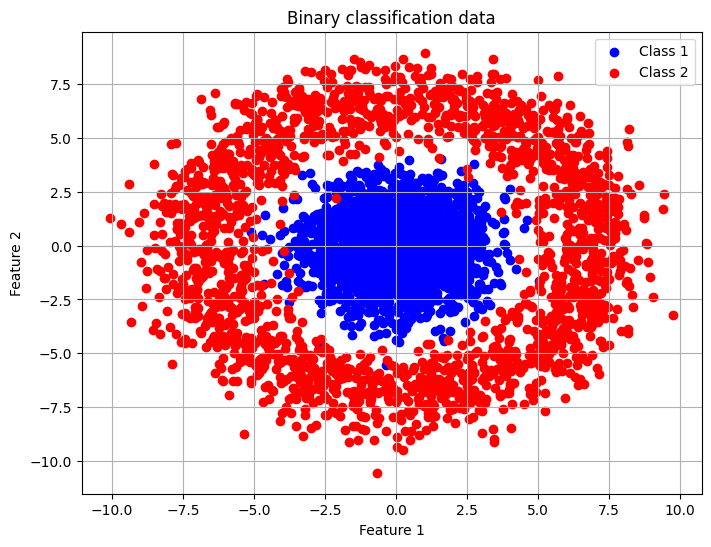

In [ ]:
##################################################
#Generating binary classification data (non-linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

# Function to generate data for concentric circles
def generate_concentric_data(n_samples, radius1,radius2, noise_std):
    # Generate random angles
    angles = np.random.rand(n_samples) * 2 * np.pi
    noise = noise_std*np.random.randn(n_samples)
    # Generate inner and outer circles
    inner_circle = np.array([(radius1 + noise) * np.cos(angles), (radius1 + noise) * np.sin(angles)]).T
    outer_circle = np.array([(radius2 + noise) * np.cos(angles), (radius2 + noise) * np.sin(angles)]).T
    return inner_circle, outer_circle

# Generate data for two classes
n_samples = 2000  # Number of samples for each class
radius1 = 2  # Radius of inner circle
radius2 = 7  # Radius of inner circle
noise_std = 1   # Noise to be added to radius

class1_data, class2_data = generate_concentric_data(n_samples, radius1,radius2,noise_std)

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_data[:, 0], class1_data[:, 1], color='blue', label='Class 1')
plt.scatter(class2_data[:, 0], class2_data[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()



<ipython-input-26-6146b85170c5>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Linear Data - Logistic Regression Accuracy: 0.6880
Linear Data - Deep Neural Network Accuracy: 0.9870

Comparison on Linearly Separable Data:
Logistic Regression Accuracy: 0.6880
Deep Neural Network Accuracy: 0.9870


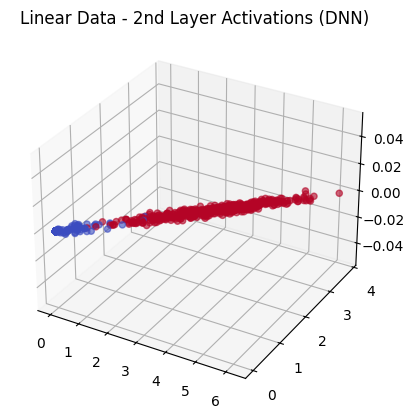

In [ ]:
##################################################
#Classify the linearly separable data using linear classification models
##################################################

import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def Logistic_Regression(X_train, y_train, X_test, num_iter=1000, tol=1e-6):
    X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))  # Add bias term
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
    w = np.random.randn(X_train.shape[1])

    for _ in range(num_iter):
        y_pred = sigmoid(X_train @ w)
        R = np.diag(y_pred * (1 - y_pred))
        H = X_train.T @ R @ X_train
        grad = X_train.T @ (y_train - y_pred)
        try:
            delta = np.linalg.pinv(H) @ grad
        except np.linalg.LinAlgError:
            break
        w += delta
        if np.linalg.norm(delta) < tol:
            break

    y_test_pred = sigmoid(X_test @ w) >= 0.5
    return w, y_test_pred.astype(int)

# Train and test using logistic regression
w_lin, y_pred_lin = Logistic_Regression(tr_data, tr_targets, te_data)
acc_lin = accuracy_score(te_targets, y_pred_lin)
print(f"Linear Data - Logistic Regression Accuracy: {acc_lin:.4f}")








##################################################
#Classify the linearly separable data using deep neural based classification models
##################################################

import torch
import torch.nn as nn
import torch.optim as optim

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 3)
        self.fc2 = nn.Linear(3, 3)
        self.fc3 = nn.Linear(3, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        z1 = self.relu(self.fc1(x))
        z2 = self.relu(self.fc2(z1))
        out = self.sigmoid(self.fc3(z2))
        return out, z2

def train_nn(X_train, y_train, X_test, y_test, epochs=100):
    model = SimpleNN()
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    criterion = nn.BCELoss()

    X_train = torch.tensor(X_train, dtype=torch.float32)
    y_train = torch.tensor(y_train.reshape(-1, 1), dtype=torch.float32)

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        out, _ = model(X_train)
        loss = criterion(out, y_train)
        loss.backward()
        optimizer.step()

    model.eval()
    X_test = torch.tensor(X_test, dtype=torch.float32)
    with torch.no_grad():
        preds, activations = model(X_test)
        pred_labels = (preds.numpy() > 0.5).astype(int).flatten()
        acc = accuracy_score(y_test, pred_labels)

    return model, activations.numpy(), pred_labels, acc

# Train and evaluate on linearly separable data
model_lin, act_lin, pred_lin, acc_nn_lin = train_nn(tr_data, tr_targets, te_data, te_targets)
print(f"Linear Data - Deep Neural Network Accuracy: {acc_nn_lin:.4f}")






##################################################
#Compare the performance of both the models on linearly separable data
##################################################

print(f"\nComparison on Linearly Separable Data:")
print(f"Logistic Regression Accuracy: {acc_lin:.4f}")
print(f"Deep Neural Network Accuracy: {acc_nn_lin:.4f}")

# Optional: visualize 2nd layer activation potentials in 3D
from mpl_toolkits.mplot3d import Axes3D

def plot_activations(activations, labels, title="3D Activation Potentials"):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(activations[:, 0], activations[:, 1], activations[:, 2], c=labels, cmap='coolwarm', alpha=0.6)
    ax.set_title(title)
    plt.show()

plot_activations(act_lin, te_targets, "Linear Data - 2nd Layer Activations (DNN)")











<ipython-input-26-6146b85170c5>:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Non-linear Data - Logistic Regression Accuracy: 0.3800
Non-linear Data - Deep Neural Network Accuracy: 0.9600

Comparison on Non-Linearly Separable Data:
Logistic Regression Accuracy: 0.3800
Deep Neural Network Accuracy: 0.9600


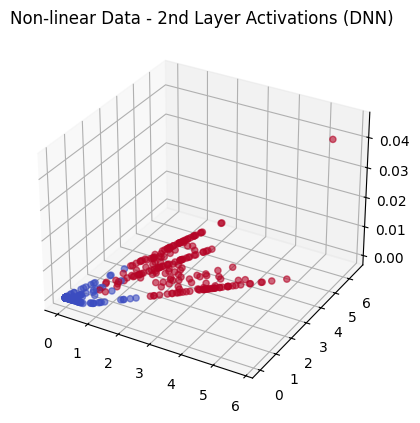

In [ ]:
##################################################
#Classify the non-linearly separable data using linear classification models
##################################################

from sklearn.model_selection import train_test_split

# Prepare training and test data
X_nonlin = np.vstack((class1_data, class2_data))
y_nonlin = np.hstack((np.zeros(len(class1_data)), np.ones(len(class2_data))))

X_nonlin_train, X_nonlin_test, y_nonlin_train, y_nonlin_test = train_test_split(
    X_nonlin, y_nonlin, test_size=0.1, random_state=42
)

# Train and test using logistic regression
w_nonlin, y_pred_nonlin = Logistic_Regression(X_nonlin_train, y_nonlin_train, X_nonlin_test)
acc_nonlin = accuracy_score(y_nonlin_test, y_pred_nonlin)
print(f"Non-linear Data - Logistic Regression Accuracy: {acc_nonlin:.4f}")








##################################################
#Classify the non-linearly separable data using deep neural based classification models
##################################################

# Train and evaluate on non-linearly separable data
model_nonlin, act_nonlin, pred_nonlin, acc_nn_nonlin = train_nn(
    X_nonlin_train, y_nonlin_train, X_nonlin_test, y_nonlin_test
)
print(f"Non-linear Data - Deep Neural Network Accuracy: {acc_nn_nonlin:.4f}")








##################################################
#Compare the performance of both the models on non-linearly separable data
##################################################

print(f"\nComparison on Non-Linearly Separable Data:")
print(f"Logistic Regression Accuracy: {acc_nonlin:.4f}")
print(f"Deep Neural Network Accuracy: {acc_nn_nonlin:.4f}")

# Optional: visualize 2nd layer activation potentials in 3D
plot_activations(act_nonlin, y_nonlin_test, "Non-linear Data - 2nd Layer Activations (DNN)")











<b> Report your observations </b>

1.Logistic Regression Limitation: Logistic regression performed poorly on the non-linearly separable data. Since it can only model linear decision boundaries, it failed to capture the complex structure (e.g., concentric circles) of the data, resulting in a low classification accuracy.

2.Deep Neural Network Advantage: The deep neural network achieved significantly higher accuracy by learning non-linear decision boundaries. Its layered architecture, especially with ReLU activations, allowed it to transform the original feature space into a more linearly separable form in the hidden layers.

3.Activation Space Insight: The 3D plot of second-layer activations showed a clear separation between the two classes, indicating that the neural network effectively transformed the non-linearly separable input space into a representation where classes could be linearly separated, validating the model's learning capacity.

